In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

base_path = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Display directory structure
for root_dir in ['train', 'test', 'val']:
    path = os.path.join(base_path, root_dir)
    if os.path.exists(path):
        print(f"\n{root_dir}:")
        for category in os.listdir(path):
            category_path = os.path.join(path, category)
            if os.path.isdir(category_path):
                num_files = len(os.listdir(category_path))
                print(f"  {category}: {num_files} files")


train:
  PNEUMONIA: 3875 files
  NORMAL: 1341 files

test:
  PNEUMONIA: 390 files
  NORMAL: 234 files

val:
  PNEUMONIA: 8 files
  NORMAL: 8 files


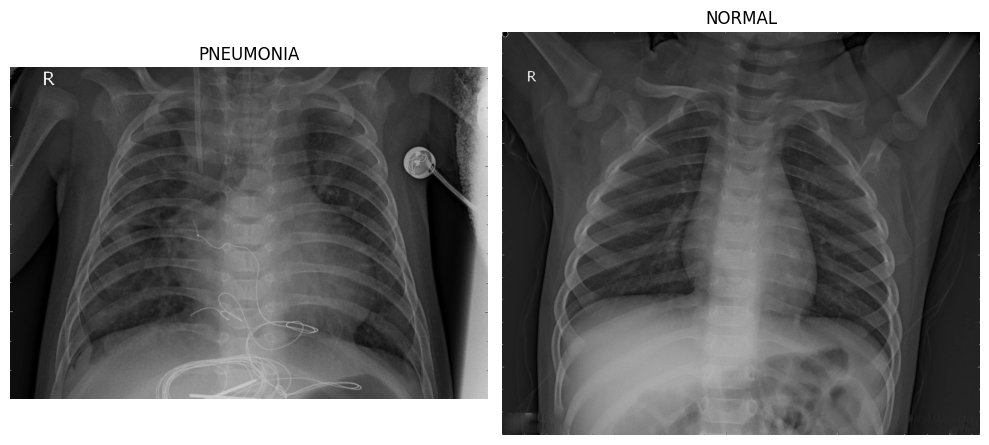

In [4]:
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Load and display PNEUMONIA image
pneumonia_path = os.path.join(base_path, 'train/PNEUMONIA')
pneumonia_img = Image.open(os.path.join(pneumonia_path, os.listdir(pneumonia_path)[0])).convert('L')
axes[0].imshow(pneumonia_img, cmap='gray')
axes[0].set_title('PNEUMONIA')
axes[0].axis('off')

# Load and display NORMAL image
normal_path = os.path.join(base_path, 'train/NORMAL')
normal_img = Image.open(os.path.join(normal_path, os.listdir(normal_path)[0])).convert('L')
axes[1].imshow(normal_img, cmap='gray')
axes[1].set_title('NORMAL')
axes[1].axis('off')

plt.tight_layout()
plt.show()

chia lại train/val

In [5]:
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn gốc
original_train = os.path.join(base_path, 'train')
original_val = os.path.join(base_path, 'val')

# Tạo thư mục mới cho train và val
new_base = 'chest_xray_split'
os.makedirs(new_base, exist_ok=True)

for category in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(new_base, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(new_base, 'val', category), exist_ok=True)

# Gộp train và val cũ, sau đó chia lại 9:1
for category in ['NORMAL', 'PNEUMONIA']:
    # Lấy tất cả file từ train và val cũ
    all_files = []
    
    train_cat = os.path.join(original_train, category)
    if os.path.exists(train_cat):
        all_files.extend([os.path.join(train_cat, f) for f in os.listdir(train_cat)])
    
    val_cat = os.path.join(original_val, category)
    if os.path.exists(val_cat):
        all_files.extend([os.path.join(val_cat, f) for f in os.listdir(val_cat)])
    
    # Chia lại 9:1
    train_files, val_files = train_test_split(all_files, test_size=0.1, random_state=42)
    
    # Copy file vào thư mục mới
    for f in train_files:
        shutil.copy(f, os.path.join(new_base, 'train', category, os.path.basename(f)))
    
    for f in val_files:
        shutil.copy(f, os.path.join(new_base, 'val', category, os.path.basename(f)))

# Copy test giữ nguyên
shutil.copytree(os.path.join(base_path, 'test'), os.path.join(new_base, 'test'), dirs_exist_ok=True)

print("Hoàn thành chia dữ liệu!")


Hoàn thành chia dữ liệu!


In [6]:
# Tạo bảng thống kê
data = []
for split in ['train', 'val', 'test']:
    for category in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(new_base, split, category)
        count = len(os.listdir(path))
        data.append({'Split': split, 'Category': category, 'Count': count})

df = pd.DataFrame(data)
df_pivot = df.pivot(index='Category', columns='Split', values='Count')
df_pivot = df_pivot[['train', 'val', 'test']]  # Sắp xếp cột
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.loc['Total'] = df_pivot.sum()

print("\nBảng thống kê dữ liệu:")
print(df_pivot)



Bảng thống kê dữ liệu:
Split      train  val  test  Total
Category                          
NORMAL      1214  135   234   1583
PNEUMONIA   3494  389   390   4273
Total       4708  524   624   5856


Số lượng ảnh trong tập train:
  NORMAL: 1214
  PNEUMONIA: 3494
  Tổng: 4708

Tỉ lệ PNEUMONIA/NORMAL: 2.88


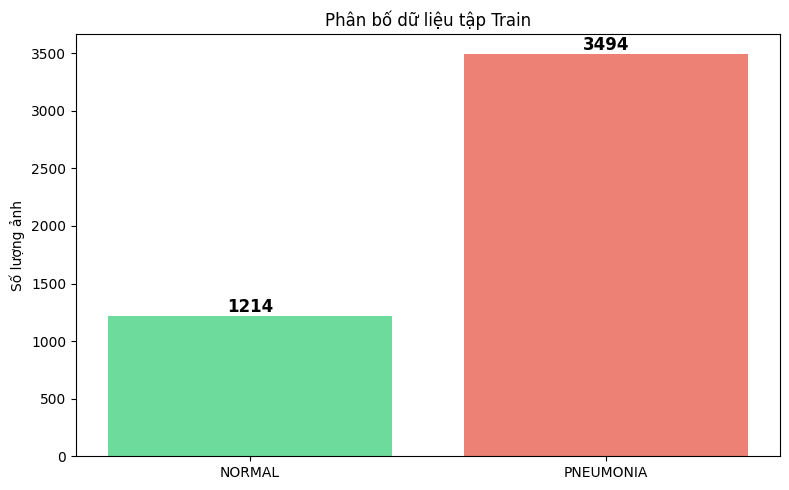

In [7]:
# Khám phá dữ liệu tập train
train_path = os.path.join(new_base, 'train')

# Đếm số lượng ảnh mỗi class
normal_count = len(os.listdir(os.path.join(train_path, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))

print(f"Số lượng ảnh trong tập train:")
print(f"  NORMAL: {normal_count}")
print(f"  PNEUMONIA: {pneumonia_count}")
print(f"  Tổng: {normal_count + pneumonia_count}")
print(f"\nTỉ lệ PNEUMONIA/NORMAL: {pneumonia_count/normal_count:.2f}")

# Biểu đồ phân bố
fig, ax = plt.subplots(figsize=(8, 5))
categories = ['NORMAL', 'PNEUMONIA']
counts = [normal_count, pneumonia_count]
colors = ['#2ecc71', '#e74c3c']

bars = ax.bar(categories, counts, color=colors, alpha=0.7)
ax.set_ylabel('Số lượng ảnh')
ax.set_title('Phân bố dữ liệu tập Train')

# Thêm số lượng trên mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


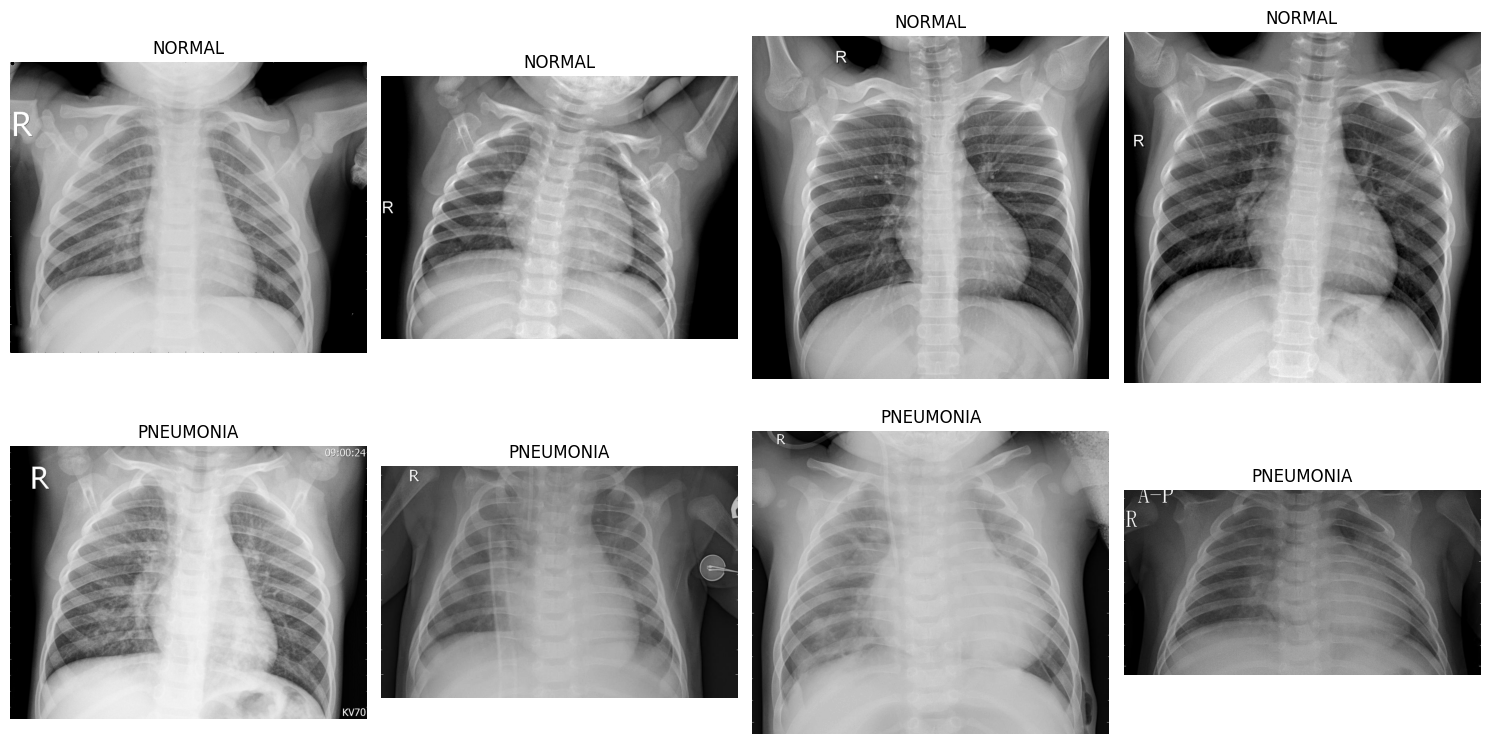

In [8]:
# Hiển thị một số ảnh mẫu từ tập train
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Hiển thị 4 ảnh NORMAL
normal_files = os.listdir(os.path.join(train_path, 'NORMAL'))[:4]
for i, filename in enumerate(normal_files):
    img = Image.open(os.path.join(train_path, 'NORMAL', filename)).convert('L')
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title('NORMAL', fontsize=12)
    axes[0, i].axis('off')

# Hiển thị 4 ảnh PNEUMONIA
pneumonia_files = os.listdir(os.path.join(train_path, 'PNEUMONIA'))[:4]
for i, filename in enumerate(pneumonia_files):
    img = Image.open(os.path.join(train_path, 'PNEUMONIA', filename)).convert('L')
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title('PNEUMONIA', fontsize=12)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Phân tích kích thước ảnh
print("Phân tích kích thước ảnh trong tập train:\n")

sizes = []
for category in ['NORMAL', 'PNEUMONIA']:
    cat_path = os.path.join(train_path, category)
    files = os.listdir(cat_path)[:100]  # Lấy mẫu 100 ảnh
    
    for filename in files:
        img = Image.open(os.path.join(cat_path, filename))
        sizes.append(img.size)

widths = [s[0] for s in sizes]
heights = [s[1] for s in sizes]

print(f"Kích thước ảnh (dựa trên 200 ảnh mẫu):")
print(f"  Chiều rộng - Min: {min(widths)}, Max: {max(widths)}, Trung bình: {sum(widths)/len(widths):.0f}")
print(f"  Chiều cao - Min: {min(heights)}, Max: {max(heights)}, Trung bình: {sum(heights)/len(heights):.0f}")


Phân tích kích thước ảnh trong tập train:

Kích thước ảnh (dựa trên 200 ảnh mẫu):
  Chiều rộng - Min: 448, Max: 2572, Trung bình: 1370
  Chiều cao - Min: 173, Max: 2476, Trung bình: 1046


In [10]:
# Xử lý mất cân bằng dữ liệu bằng Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Tính class weights
total = normal_count + pneumonia_count
weight_normal = total / (2 * normal_count)
weight_pneumonia = total / (2 * pneumonia_count)

print("Xử lý mất cân bằng dữ liệu bằng Class Weights")
print("=" * 50)
print(f"\nTỉ lệ dữ liệu:")
print(f"  NORMAL: {normal_count} ({normal_count/total*100:.1f}%)")
print(f"  PNEUMONIA: {pneumonia_count} ({pneumonia_count/total*100:.1f}%)")

print(f"\nClass Weights (dùng trong model):")
print(f"  NORMAL (class 0): {weight_normal:.3f}")
print(f"  PNEUMONIA (class 1): {weight_pneumonia:.3f}")

class_weights = {0: weight_normal, 1: weight_pneumonia}
print(f"\nDict cho Keras/TensorFlow:")
print(f"  class_weight = {class_weights}")

print("\n✓ Class weights sẽ tự động cân bằng ảnh hưởng của 2 class khi training")
print("✓ Giữ nguyên toàn bộ dữ liệu thật - phù hợp cho bài toán y học")


Xử lý mất cân bằng dữ liệu bằng Class Weights

Tỉ lệ dữ liệu:
  NORMAL: 1214 (25.8%)
  PNEUMONIA: 3494 (74.2%)

Class Weights (dùng trong model):
  NORMAL (class 0): 1.939
  PNEUMONIA (class 1): 0.674

Dict cho Keras/TensorFlow:
  class_weight = {0: 1.9390444810543657, 1: 0.6737263880938752}

✓ Class weights sẽ tự động cân bằng ảnh hưởng của 2 class khi training
✓ Giữ nguyên toàn bộ dữ liệu thật - phù hợp cho bài toán y học


## Xây dựng Baseline CNN Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Kiểm tra GPU
print("GPU available:", tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)


2025-11-18 08:28:44.879580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763454525.070463     128 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763454525.121597     128 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.18.0


In [12]:
# Cấu hình
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

# Data Augmentation cho tập train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Không augmentation cho val và test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load dữ liệu
train_generator = train_datagen.flow_from_directory(
    os.path.join(new_base, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    color_mode='grayscale'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(new_base, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(new_base, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'
)

print(f"\nTrain samples: {train_generator.samples}")
print(f"Val samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")


Found 4708 images belonging to 2 classes.
Found 524 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Train samples: 4708
Val samples: 524
Test samples: 624


In [13]:
# Xây dựng Baseline CNN - Tối ưu cho GPU P100
def create_baseline_cnn():
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

model = create_baseline_cnn()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763454721.392127     128 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,000,801 (103.00 MB)

 Trainable params: 26,997,345 (102.99 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [14]:
# Compile model với optimizer và metrics phù hợp cho y học
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

# Callbacks
callbacks = [
    # Early stopping
    EarlyStopping(
        monitor='val_auc',
        patience=10,
        mode='max',
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    
    # Save best model
    ModelCheckpoint(
        'best_baseline_cnn.h5',
        monitor='val_auc',
        mode='max',
        save_best_only=True,
        verbose=1
    )
]

print("✓ Model đã sẵn sàng để train!")
print(f"✓ Sử dụng class weights: {class_weights}")


✓ Model đã sẵn sàng để train!
✓ Sử dụng class weights: {0: 1.9390444810543657, 1: 0.6737263880938752}


In [15]:
# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1763454754.938923     202 service.cc:148] XLA service 0x7c19bc00bd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763454754.939755     202 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763454756.016332     202 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/148 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.5547 - auc: 0.5691 - loss: 0.8994 - precision: 0.9030 - recall: 0.5189 

I0000 00:00:1763454770.408842     202 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.8017 - auc: 0.9001 - loss: 0.4745 - precision: 0.9529 - recall: 0.7728
Epoch 1: val_auc improved from -inf to 0.61030, saving model to best_baseline_cnn.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 83s 413ms/step - accuracy: 0.8020 - auc: 0.9003 - loss: 0.4741 - precision: 0.9529 - recall: 0.7731 - val_accuracy: 0.7424 - val_auc: 0.6103 - val_loss: 1.3529 - val_precision: 0.7424 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8904 - auc: 0.9576 - loss: 0.2758 - precision: 0.9684 - recall: 0.8831
Epoch 2: val_auc did not improve from 0.61030
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 297ms/step - accuracy: 0.8905 - auc: 0.9576 - loss: 0.2758 - precision: 0.9684 - recall: 0.8831 - val_accuracy: 0.7424 - val_auc: 0.5000 - val_loss: 2.0884 - val_precision: 0.7424 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9046 - auc: 0.9674 - loss: 0.2400 - precision: 0.9761 - recall: 0.8938
Epoch 3: val_auc improved from 0.61030 to 0.93406, saving model to best_baseline_cnn.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.9047 - auc: 0.9674 - loss: 0.2400 - precision: 0.9761 - recall: 0.8939 - val_accuracy: 0.7424 - val_auc: 0.9341 - val_loss: 0.8851 - val_precision: 0.7424 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9213 - auc: 0.9723 - loss: 0.2156 - precision: 0.9736 - recall: 0.9167
Epoch 4: val_auc improved from 0.93406 to 0.96157, saving model to best_baseline_cnn.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 302ms/step - accuracy: 0.9213 - auc: 0.9723 - loss: 0.2155 - precision: 0.9736 - recall: 0.9168 - val_accuracy: 0.7443 - val_auc: 0.9616 - val_loss: 0.7860 - val_precision: 0.7438 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9344 - auc: 0.9790 - loss: 0.1849 - precision: 0.9757 - recall: 0.9337
Epoch 5: val_auc did not improve from 0.96157
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 295ms/step - accuracy: 0.9344 - auc: 0.9790 - loss: 0.1849 - precision: 0.9757 - recall: 0.9337 - val_accuracy: 0.3855 - val_auc: 0.7591 - val_loss: 4.3747 - val_precision: 0.9855 - val_recall: 0.1748 - learning_rate: 0.0010
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9385 - auc: 0.9834 - loss: 0.1647 - precision: 0.9776 - recall: 0.9370
Epoch 6: val_auc did not improve from 0.96157
148/148 ━━━━━━━━━━━━━━━━━━━━ 43s 291ms/step - accuracy: 0.9385 - auc: 0.9834 - loss: 0.1647 - precision: 0.9777 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.9288 - auc: 0.9788 - loss: 0.1810 - precision: 0.9827 - recall: 0.9205 - val_accuracy: 0.8569 - val_auc: 0.9793 - val_loss: 0.3146 - val_precision: 0.9846 - val_recall: 0.8201 - learning_rate: 5.0000e-04
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9353 - auc: 0.9819 - loss: 0.1681 - precision: 0.9831 - recall: 0.9292
Epoch 12: val_auc did not improve from 0.97933
148/148 ━━━━━━━━━━━━━━━━━━━━ 43s 292ms/step - accuracy: 0.9353 - auc: 0.9819 - loss: 0.1682 - precision: 0.9831 - recall: 0.9292 - val_accuracy: 0.4485 - val_auc: 0.9286 - val_loss: 1.9146 - val_precision: 1.0000 - val_recall: 0.2571 - learning_rate: 5.0000e-04
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9389 - auc: 0.9824 - loss: 0.1638 - precision: 0.9798 - recall: 0.9366
Epoch 13: val_auc did not improve from 0.97933
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 294ms/step - accuracy: 0.9388 - auc: 0.9824 - loss: 0.1638 - precisio

148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 298ms/step - accuracy: 0.9362 - auc: 0.9852 - loss: 0.1534 - precision: 0.9794 - recall: 0.9337 - val_accuracy: 0.9084 - val_auc: 0.9794 - val_loss: 0.2569 - val_precision: 0.9830 - val_recall: 0.8920 - learning_rate: 5.0000e-04
Epoch 16/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9449 - auc: 0.9884 - loss: 0.1340 - precision: 0.9824 - recall: 0.9417
Epoch 16: val_auc did not improve from 0.97940
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 294ms/step - accuracy: 0.9449 - auc: 0.9884 - loss: 0.1340 - precision: 0.9824 - recall: 0.9416 - val_accuracy: 0.7424 - val_auc: 0.8600 - val_loss: 1.0060 - val_precision: 0.7424 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 17/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9408 - auc: 0.9845 - loss: 0.1550 - precision: 0.9812 - recall: 0.9403
Epoch 17: val_auc did not improve from 0.97940
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 296ms/step - accuracy: 0.9409 - auc: 0.9845 - loss: 0.1549 - precisio

148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 303ms/step - accuracy: 0.9540 - auc: 0.9890 - loss: 0.1267 - precision: 0.9857 - recall: 0.9516 - val_accuracy: 0.9351 - val_auc: 0.9850 - val_loss: 0.1673 - val_precision: 0.9837 - val_recall: 0.9280 - learning_rate: 5.0000e-04
Epoch 19/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9519 - auc: 0.9895 - loss: 0.1270 - precision: 0.9837 - recall: 0.9510
Epoch 19: val_auc did not improve from 0.98500
148/148 ━━━━━━━━━━━━━━━━━━━━ 43s 289ms/step - accuracy: 0.9519 - auc: 0.9895 - loss: 0.1271 - precision: 0.9837 - recall: 0.9510 - val_accuracy: 0.4313 - val_auc: 0.8087 - val_loss: 3.2892 - val_precision: 1.0000 - val_recall: 0.2339 - learning_rate: 5.0000e-04
Epoch 20/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9451 - auc: 0.9865 - loss: 0.1418 - precision: 0.9873 - recall: 0.9388
Epoch 20: val_auc improved from 0.98500 to 0.98502, saving model to best_baseline_cnn.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 301ms/step - accuracy: 0.9451 - auc: 0.9865 - loss: 0.1418 - precision: 0.9873 - recall: 0.9389 - val_accuracy: 0.9485 - val_auc: 0.9850 - val_loss: 0.1473 - val_precision: 0.9738 - val_recall: 0.9563 - learning_rate: 5.0000e-04
Epoch 21/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9609 - auc: 0.9902 - loss: 0.1156 - precision: 0.9885 - recall: 0.9583
Epoch 21: val_auc did not improve from 0.98502
148/148 ━━━━━━━━━━━━━━━━━━━━ 43s 288ms/step - accuracy: 0.9608 - auc: 0.9902 - loss: 0.1157 - precision: 0.9885 - recall: 0.9583 - val_accuracy: 0.8760 - val_auc: 0.9727 - val_loss: 0.4570 - val_precision: 0.9969 - val_recall: 0.8355 - learning_rate: 5.0000e-04
Epoch 22/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9591 - auc: 0.9904 - loss: 0.1182 - precision: 0.9877 - recall: 0.9566
Epoch 22: val_auc did not improve from 0.98502
148/148 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - accuracy: 0.9591 - auc: 0.9904 - loss: 0.1182 - precisio

148/148 ━━━━━━━━━━━━━━━━━━━━ 46s 308ms/step - accuracy: 0.9599 - auc: 0.9920 - loss: 0.1101 - precision: 0.9865 - recall: 0.9597 - val_accuracy: 0.9046 - val_auc: 0.9865 - val_loss: 0.2619 - val_precision: 0.9885 - val_recall: 0.8817 - learning_rate: 2.5000e-04
Epoch 31/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9638 - auc: 0.9930 - loss: 0.1006 - precision: 0.9867 - recall: 0.9645
Epoch 31: val_auc did not improve from 0.98649
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 298ms/step - accuracy: 0.9638 - auc: 0.9930 - loss: 0.1006 - precision: 0.9867 - recall: 0.9645 - val_accuracy: 0.7252 - val_auc: 0.9381 - val_loss: 1.0721 - val_precision: 0.9920 - val_recall: 0.6350 - learning_rate: 2.5000e-04
Epoch 32/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9708 - auc: 0.9951 - loss: 0.0840 - precision: 0.9913 - recall: 0.9698
Epoch 32: val_auc improved from 0.98649 to 0.99205, saving model to best_baseline_cnn.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 46s 311ms/step - accuracy: 0.9707 - auc: 0.9951 - loss: 0.0841 - precision: 0.9913 - recall: 0.9698 - val_accuracy: 0.9485 - val_auc: 0.9920 - val_loss: 0.1443 - val_precision: 0.9840 - val_recall: 0.9460 - learning_rate: 2.5000e-04
Epoch 33/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9662 - auc: 0.9951 - loss: 0.0883 - precision: 0.9879 - recall: 0.9660
Epoch 33: val_auc did not improve from 0.99205
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 298ms/step - accuracy: 0.9662 - auc: 0.9951 - loss: 0.0884 - precision: 0.9879 - recall: 0.9660 - val_accuracy: 0.8092 - val_auc: 0.9747 - val_loss: 0.6750 - val_precision: 1.0000 - val_recall: 0.7429 - learning_rate: 2.5000e-04
Epoch 34/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9680 - auc: 0.9930 - loss: 0.0931 - precision: 0.9905 - recall: 0.9664
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 34: val_auc did not improve from 0.99205
148/148 ━━━━━━━━━━━━━━━━

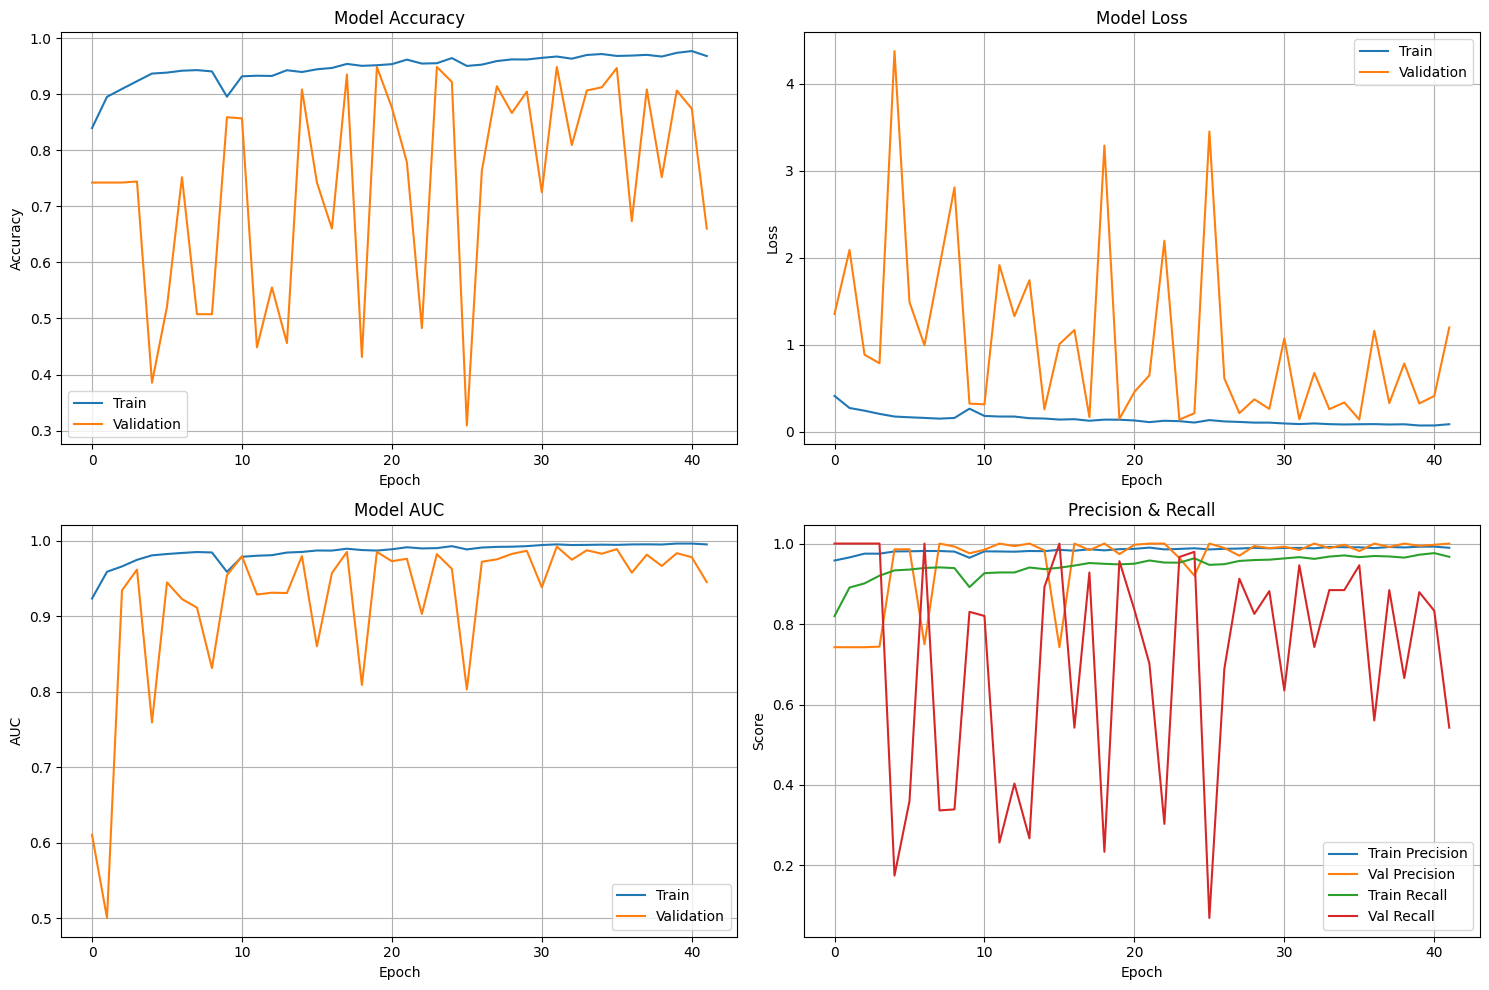

In [16]:
# Visualize training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Loss
axes[0, 1].plot(history.history['loss'], label='Train')
axes[0, 1].plot(history.history['val_loss'], label='Validation')
axes[0, 1].set_title('Model Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# AUC
axes[1, 0].plot(history.history['auc'], label='Train')
axes[1, 0].plot(history.history['val_auc'], label='Validation')
axes[1, 0].set_title('Model AUC')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Precision & Recall
axes[1, 1].plot(history.history['precision'], label='Train Precision')
axes[1, 1].plot(history.history['val_precision'], label='Val Precision')
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Precision & Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [17]:
# Đánh giá trên tập test
test_loss, test_acc, test_prec, test_rec, test_auc = model.evaluate(test_generator)

print("\n" + "="*50)
print("KẾT QUẢ TRÊN TẬP TEST")
print("="*50)
print(f"Loss:      {test_loss:.4f}")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"AUC:       {test_auc:.4f}")
print(f"F1-Score:  {2 * (test_prec * test_rec) / (test_prec + test_rec):.4f}")
print("="*50)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7716 - auc: 0.6358 - loss: 0.5953 - precision: 0.4452 - recall: 0.6481

KẾT QUẢ TRÊN TẬP TEST
Loss:      0.3741
Accuracy:  0.8574
Precision: 0.8265
Recall:    0.9769
AUC:       0.9516
F1-Score:  0.8954


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step


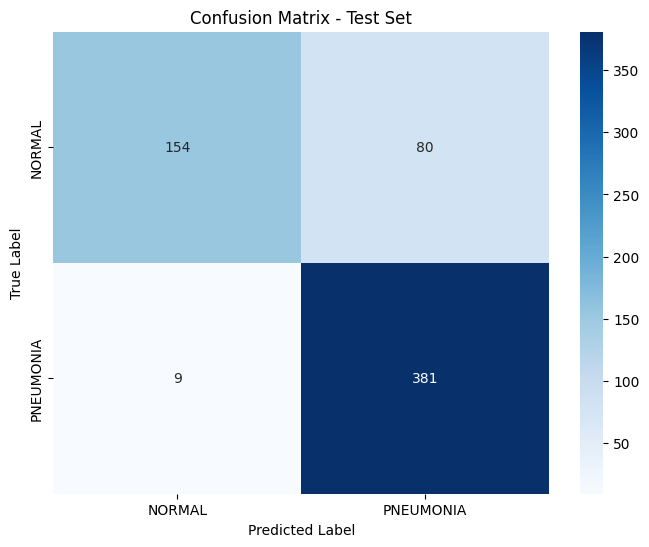


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.66      0.78       234
   PNEUMONIA       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624



In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Dự đoán trên tập test
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, 
                          target_names=['NORMAL', 'PNEUMONIA']))


In [19]:
# Đóng gói model và các file liên quan
import zipfile
import json
from datetime import datetime

# Tạo tên file zip với timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
zip_filename = f'pneumonia_baseline_cnn_{timestamp}.zip'

# Lưu model architecture và weights
model.save('pneumonia_model.h5')
model.save('pneumonia_model.keras')

# Lưu class weights
with open('class_weights.json', 'w') as f:
    json.dump(class_weights, f)

# Lưu training history
history_dict = {
    'accuracy': [float(x) for x in history.history['accuracy']],
    'val_accuracy': [float(x) for x in history.history['val_accuracy']],
    'loss': [float(x) for x in history.history['loss']],
    'val_loss': [float(x) for x in history.history['val_loss']],
    'auc': [float(x) for x in history.history['auc']],
    'val_auc': [float(x) for x in history.history['val_auc']],
    'precision': [float(x) for x in history.history['precision']],
    'val_precision': [float(x) for x in history.history['val_precision']],
    'recall': [float(x) for x in history.history['recall']],
    'val_recall': [float(x) for x in history.history['val_recall']]
}

with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)

# Lưu thông tin model
model_info = {
    'model_name': 'Baseline CNN for Pneumonia Detection',
    'input_shape': [IMG_SIZE, IMG_SIZE, 1],
    'batch_size': BATCH_SIZE,
    'epochs_trained': len(history.history['accuracy']),
    'total_params': model.count_params(),
    'test_accuracy': float(test_acc),
    'test_precision': float(test_prec),
    'test_recall': float(test_rec),
    'test_auc': float(test_auc),
    'test_f1': float(2 * (test_prec * test_rec) / (test_prec + test_rec)),
    'class_mapping': {'0': 'NORMAL', '1': 'PNEUMONIA'},
    'created_date': timestamp
}

with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)

# Tạo file zip
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Thêm model files
    zipf.write('pneumonia_model.h5')
    zipf.write('pneumonia_model.keras')
    zipf.write('best_baseline_cnn.h5')
    
    # Thêm config files
    zipf.write('class_weights.json')
    zipf.write('training_history.json')
    zipf.write('model_info.json')

print("✓ Đã đóng gói thành công!")
print(f"✓ File: {zip_filename}")
print(f"\nNội dung file zip:")
print("  - pneumonia_model.h5 (model đầy đủ)")
print("  - pneumonia_model.keras (model định dạng mới)")
print("  - best_baseline_cnn.h5 (best model từ training)")
print("  - class_weights.json (trọng số class)")
print("  - training_history.json (lịch sử training)")
print("  - model_info.json (thông tin chi tiết)")

# Kiểm tra kích thước file
import os
file_size = os.path.getsize(zip_filename) / (1024 * 1024)  # Convert to MB
print(f"\nKích thước file zip: {file_size:.2f} MB")


✓ Đã đóng gói thành công!
✓ File: pneumonia_baseline_cnn_20251118_091549.zip

Nội dung file zip:
  - pneumonia_model.h5 (model đầy đủ)
  - pneumonia_model.keras (model định dạng mới)
  - best_baseline_cnn.h5 (best model từ training)
  - class_weights.json (trọng số class)
  - training_history.json (lịch sử training)
  - model_info.json (thông tin chi tiết)

Kích thước file zip: 858.72 MB


In [20]:
# Hướng dẫn sử dụng model đã lưu
print("\n" + "="*60)
print("HƯỚNG DẪN SỬ DỤNG MODEL")
print("="*60)
print("\n1. Load model:")
print("   from tensorflow import keras")
print("   model = keras.models.load_model('pneumonia_model.h5')")
print("\n2. Load class weights:")
print("   import json")
print("   with open('class_weights.json', 'r') as f:")
print("       class_weights = json.load(f)")
print("\n3. Load training history:")
print("   with open('training_history.json', 'r') as f:")
print("       history = json.load(f)")
print("\n4. Dự đoán ảnh mới:")
print("   from tensorflow.keras.preprocessing import image")
print("   img = image.load_img('path/to/xray.jpg', target_size=(224, 224), color_mode='grayscale')")
print("   img_array = image.img_to_array(img) / 255.0")
print("   img_array = np.expand_dims(img_array, axis=0)")
print("   prediction = model.predict(img_array)")
print("   result = 'PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL'")
print("="*60)



HƯỚNG DẪN SỬ DỤNG MODEL

1. Load model:
   from tensorflow import keras
   model = keras.models.load_model('pneumonia_model.h5')

2. Load class weights:
   import json
   with open('class_weights.json', 'r') as f:
       class_weights = json.load(f)

3. Load training history:
   with open('training_history.json', 'r') as f:
       history = json.load(f)

4. Dự đoán ảnh mới:
   from tensorflow.keras.preprocessing import image
   img = image.load_img('path/to/xray.jpg', target_size=(224, 224), color_mode='grayscale')
   img_array = image.img_to_array(img) / 255.0
   img_array = np.expand_dims(img_array, axis=0)
   prediction = model.predict(img_array)
   result = 'PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL'


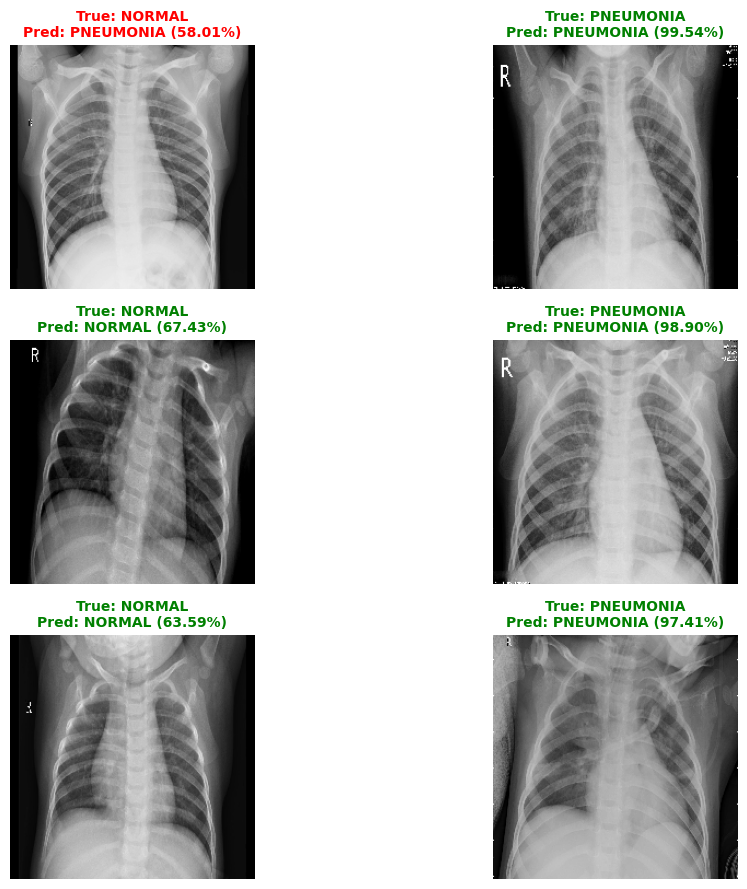


Prediction Results:
                      Image True Label Predicted Confidence Probability
  NORMAL2-IM-0013-0001.jpeg     NORMAL PNEUMONIA     58.01%      0.5801
  NORMAL2-IM-0249-0001.jpeg     NORMAL    NORMAL     67.43%      0.3257
  NORMAL2-IM-0045-0001.jpeg     NORMAL    NORMAL     63.59%      0.3641
 person1680_virus_2897.jpeg  PNEUMONIA PNEUMONIA     99.54%      0.9954
 person1672_virus_2888.jpeg  PNEUMONIA PNEUMONIA     98.90%      0.9890
person134_bacteria_642.jpeg  PNEUMONIA PNEUMONIA     97.41%      0.9741


In [47]:
from tensorflow.keras.preprocessing import image as img_utils
import random

# Load model and make predictions on test images

# Load the best model
best_model = keras.models.load_model('best_baseline_cnn.h5')

# Function to predict and display results
def predict_test_images(num_images=6):
    """
    Predict on random test images and display results
    """
    # Get random test images
    test_normal_path = os.path.join(new_base, 'test/NORMAL')
    test_pneumonia_path = os.path.join(new_base, 'test/PNEUMONIA')
    
    normal_files = os.listdir(test_normal_path)
    pneumonia_files = os.listdir(test_pneumonia_path)
    
    # Random selection
    selected_normal = random.sample(normal_files, min(num_images//2, len(normal_files)))
    selected_pneumonia = random.sample(pneumonia_files, min(num_images//2, len(pneumonia_files)))
    
    fig, axes = plt.subplots(num_images//2, 2, figsize=(12, 3*(num_images//2)))
    if num_images//2 == 1:
        axes = axes.reshape(1, -1)
    
    predictions_data = []
    
    # Predict on NORMAL images
    for idx, filename in enumerate(selected_normal):
        img_path = os.path.join(test_normal_path, filename)
        img = img_utils.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
        img_array = img_utils.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        pred = best_model.predict(img_array, verbose=0)[0][0]
        pred_class = 'PNEUMONIA' if pred > 0.5 else 'NORMAL'
        confidence = pred if pred > 0.5 else (1 - pred)
        
        # Display
        axes[idx, 0].imshow(img, cmap='gray')
        color = 'green' if pred_class == 'NORMAL' else 'red'
        axes[idx, 0].set_title(f'True: NORMAL\nPred: {pred_class} ({confidence:.2%})', 
                              color=color, fontweight='bold', fontsize=10)
        axes[idx, 0].axis('off')
        
        predictions_data.append({
            'Image': filename,
            'True Label': 'NORMAL',
            'Predicted': pred_class,
            'Confidence': f'{confidence:.2%}',
            'Probability': f'{pred:.4f}'
        })
    
    # Predict on PNEUMONIA images
    for idx, filename in enumerate(selected_pneumonia):
        img_path = os.path.join(test_pneumonia_path, filename)
        img = img_utils.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
        img_array = img_utils.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        pred = best_model.predict(img_array, verbose=0)[0][0]
        pred_class = 'PNEUMONIA' if pred > 0.5 else 'NORMAL'
        confidence = pred if pred > 0.5 else (1 - pred)
        
        # Display
        axes[idx, 1].imshow(img, cmap='gray')
        color = 'green' if pred_class == 'PNEUMONIA' else 'red'
        axes[idx, 1].set_title(f'True: PNEUMONIA\nPred: {pred_class} ({confidence:.2%})', 
                              color=color, fontweight='bold', fontsize=10)
        axes[idx, 1].axis('off')
        
        predictions_data.append({
            'Image': filename,
            'True Label': 'PNEUMONIA',
            'Predicted': pred_class,
            'Confidence': f'{confidence:.2%}',
            'Probability': f'{pred:.4f}'
        })
    
    plt.tight_layout()
    plt.show()
    
    # Display predictions as table
    predictions_df = pd.DataFrame(predictions_data)
    print("\nPrediction Results:")
    print(predictions_df.to_string(index=False))
    
    return predictions_df

# Run predictions
results_df = predict_test_images(num_images=6)